### ANALYSIS ON HOUSE PRICE PREDICTION IN CHENNAI CITY

## OBJECTIVES:
####  * To compare how the sales prices of the house varies with different area in chennai.
#### * To study the factor influncing the sales price of the house:
#### I) depends on the main road distance from the house
#### II) depends on the parking facility
#### III) depends on the buildtype of the house.
#### IV) Number of rooms,bathrooms,bedrooms.
#### V) depends on utility available.
#### VI)  depends on the square feet of the house
#### VII)depends on the sales condtion
#### VIII) depends on the types of street
#### *To predict the sales prices of the house for customers.

In [166]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [167]:
df=pd.read_csv("C:/nidhisha/chennai_house_price_prediction.csv")

In [168]:
df.head(8)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250


In [169]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [170]:
# AbNormal-abnormal sale-trade,foreclosure,short sale
#family-sales between the family members
#partial-house was not completed when last assessed
#adjland-adjoing the land purchase
#normal-normal sales

In [171]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [172]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [173]:
#AllPub-all the public utilites(E,G,W,S)
#NoSewr-electricity,gas,water
#NoSeWa-e,g only
#ELO-e only

In [174]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [175]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [176]:
# A-agriculture
#C-commercial
#i-industrial
#RH-residential high density
#RL-residential low density
#RM-residentail medium density

In [177]:
df.shape

(7109, 19)

In [178]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

In [180]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

## cleaning the data

In [181]:
temp=pd.DataFrame(index=df.columns)
temp["dtypes"]=df.dtypes
temp["null_value"]=df.isnull().sum()
temp["unique_value"]=df.nunique()
temp

,dtypes,null_value,unique_value
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


In [182]:
df["N_BEDROOM"].value_counts()*100/len(df["N_BEDROOM"])

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

<AxesSubplot:>

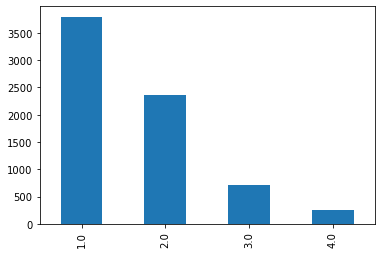

In [183]:
df["N_BEDROOM"].value_counts().plot(kind="bar")

In [184]:
df["N_BEDROOM"]=df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0])

In [185]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)

In [186]:
df["N_BEDROOM"].dtypes

dtype('int32')

In [187]:
df[df["N_BATHROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [188]:
l1=[23,45,609,4567,2341,3451,1234,5432,6978]
df.loc[l1,["N_BATHROOM","N_BEDROOM"]]

,N_BATHROOM,N_BEDROOM
23,1.0,1
45,1.0,1
609,1.0,1
4567,1.0,1
2341,2.0,3
3451,1.0,1
1234,1.0,1
5432,1.0,1
6978,1.0,2


<AxesSubplot:>

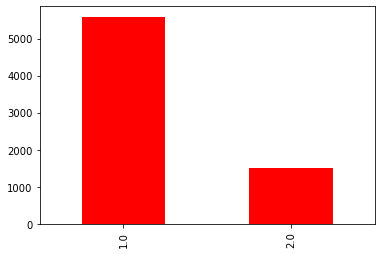

In [189]:
df["N_BATHROOM"].value_counts().plot(kind="bar",color="red")

In [190]:
for i in range(0,len(df)):
    if(pd.isnull(df["N_BATHROOM"][i])==True):
        if(df["N_BEDROOM"][i]==1.0):
            df["N_BATHROOM"][i]=1.0
        else:
            df["N_BATHROOM"][i]=2.0

In [191]:
# filling the overall qs_overall
df["QS_OVERALL"].fillna(df["QS_OVERALL"].mean(),inplace=True)

In [192]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [193]:
for col in df.columns:
    if(df[col].dtypes=="object"):
        print(col)
        print()
        print(df[col].unique())       

PRT_ID

['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']
AREA

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
SALE_COND

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
PARK_FACIL

['Yes' 'No' 'Noo']
BUILDTYPE

['Commercial' 'Others' 'Other' 'House' 'Comercial']
UTILITY_AVAIL

['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
STREET

['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
MZZONE

['A' 'RH' 'RL' 'I' 'C' 'RM']


In [194]:
def replace(colName, mistaken,corrected):
    df[colName].replace(mistaken,corrected,inplace=True)        

In [195]:
# replacing the area.
replace("AREA",["Anna Nagar","Ana Nagar","Ann Nagar"],"Anna Nagar")
replace("AREA",["Karapakkam","Karapakam"],"Karapakkam")
replace("AREA",["Adyar","Adyr"],"Adyar")
replace("AREA",["Velachery","Velchery"],"Velachery")
replace("AREA",["Chrompet","Chrompt","Chrmpet","Chrmpet","Chormpet"],"Chrompet")
replace("AREA",["KK Nagar","KKNagar"],"KKNagar")
replace("AREA",["TNagar","T Nagar"],"TNagar")

In [196]:
#replacing the sales_condition
replace("SALE_COND",["AbNormal","Ab Normal"],"AbNormal")
replace("SALE_COND",["Partial","Partiall","PartiaLl"],"Partial")
replace("SALE_COND",["AdjLand","Adj Land"],"AdjLand")

In [197]:
#replacing the parking facility
replace("PARK_FACIL",["No","Noo"],"No")

In [198]:
# replacing the buildtype
replace("BUILDTYPE",["Commercial","Comercial"],"Commercial")
replace("BUILDTYPE",["Others","Other"],"Other")

In [199]:
# replacing the utility availability
replace("UTILITY_AVAIL",["AllPub","All Pub"],"AllPub")
replace("UTILITY_AVAIL",["NoSewr","NoSeWa"],"NoSeWa")

In [200]:
# replacing the street 
replace("STREET",["Paved","Pavd"],"Paved")
replace("STREET",["No Access","NoAccess"],"NoAccess")

In [201]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [202]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213251,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409632,1.019099,0.891972,0.897834,0.887266,0.525440,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


# outliers

Text(0.5, 0, 'sales')

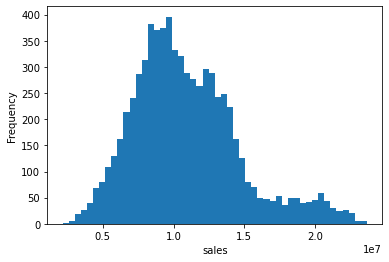

In [203]:
df["SALES_PRICE"].plot.hist(bins=50)
plt.xlabel("sales")

In [204]:
(df["SALES_PRICE"].loc[df["SALES_PRICE"]>18000000])

1       21717770
19      21203240
44      18725520
47      20215970
117     19206870
          ...   
7024    20782250
7058    21185700
7068    19798550
7076    23013500
7100    19501600
Name: SALES_PRICE, Length: 444, dtype: int64

In [205]:
def outlier_treatments(column):
    sorted(column)
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*Q1)
    upper_range=Q3+(1.5*Q3)
    return lower_range,upper_range
    

In [206]:
lower_bound,upper_bound=outlier_treatments(df["SALES_PRICE"])
print(lower_bound,upper_bound)
df[(df.SALES_PRICE < lower_bound) | (df.SALES_PRICE > upper_bound)]

-4136050.0 32484750.0


,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE


##  Bivariate Analysis

### checking the normalities

In [207]:
import statsmodels.api as sm

Text(0.5, 1.0, ' Q-Q plot represent the distribution of sales price')

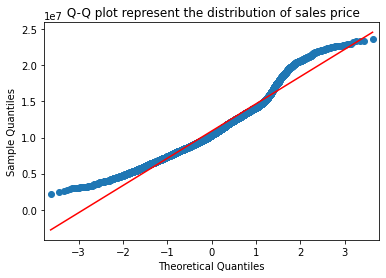

In [208]:
sm.qqplot(df["SALES_PRICE"],line="s")
plt.title(" Q-Q plot represent the distribution of sales price")

## Influcing the sales price of the house based on parking facilities

In [209]:
df["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [210]:
park_no,park_yes=df.groupby("PARK_FACIL")["SALES_PRICE"]
park_no=pd.DataFrame({"sales_park_no":park_no[1]})
park_yes=pd.DataFrame({"sales_park_yes":park_yes[1]})

Text(0.5, 1.0, ' Q-Q plot represent the distribution of sales price which has no parking facilities')

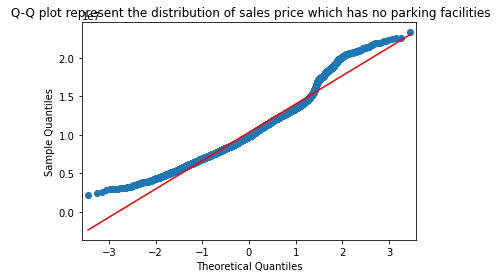

In [211]:
sm.qqplot(park_no["sales_park_no"],line="s")
plt.title(" Q-Q plot represent the distribution of sales price which has no parking facilities")

Text(0.5, 1.0, ' Q-Q plot represent the distribution of sales price which has parking faciliies.')

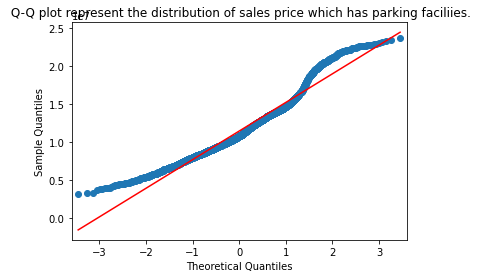

In [212]:
sm.qqplot(park_yes["sales_park_yes"],line="s")
plt.title(" Q-Q plot represent the distribution of sales price which has parking faciliies.")

In [213]:
from scipy.stats import ttest_ind

In [214]:
from scipy.stats import mannwhitneyu

In [215]:
stat, p_value = mannwhitneyu(park_no, park_yes)
p_value

array([5.39632214e-38])

In [216]:
ttest,p_value=ttest_ind(a=park_no,b=park_yes,alternative="two-sided")

In [217]:
print(p_value)

[2.28220219e-35]


In [218]:
if(p_value<0.05):
    print("We are rejecting the null hypothesis")
    print()
else:
    print("We are not rejecting the null hypotesis")
    print()

We are rejecting the null hypothesis



## Influcing the sales price of the house based on type of the bulidings

In [219]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [220]:
from scipy.stats import f_oneway

In [221]:
commercial,other,house=df.groupby("BUILDTYPE")["SALES_PRICE"]
commercial=pd.DataFrame({"commercial":commercial[1]})
other=pd.DataFrame({"other":other[1]})
house=pd.DataFrame({"house":house[1]})

In [222]:
statistic,p_value=f_oneway(commercial,other,house)
p_value

array([0.])

In [223]:
if(p_value<0.05):
    print("We are rejecting the null hypothesis")
    print()
else:
    print("We are not rejecting the null hypotesis")
    print()

We are rejecting the null hypothesis



In [224]:
build=["commercial","other","house"]
a=[np.mean(commercial["commercial"]),np.mean(other["other"]),np.mean(house["house"])]
a=pd.DataFrame({"mean":a,"type":build})

Text(0.5, 1.0, 'Bar graph represent the mean sale price of the house based on the Building type ')

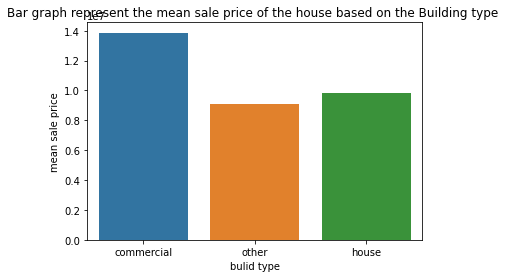

In [225]:
sns.barplot(x=a["type"],y=a["mean"])
plt.xlabel("bulid type")
plt.ylabel("mean sale price")
plt.title("Bar graph represent the mean sale price of the house based on the Building type ")

## Inlfucing the sales price of the house based on the sales condtion

In [226]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [227]:
from scipy.stats import f_oneway

In [228]:
abnormal,family,partial,adjland,normal_sale=df.groupby("SALE_COND")["SALES_PRICE"]
abnormal=pd.DataFrame({"AbNormal":abnormal[1]})
family=pd.DataFrame({"Family":family[1]})
partial=pd.DataFrame({"Partial":partial[1]})
adjland=pd.DataFrame({"AdjLand":adjland[1]})
normal_sale=pd.DataFrame({"Normal Sale":normal_sale[1]})

In [229]:
statistic,p_value=f_oneway(abnormal,family,partial,adjland,normal_sale)
p_value

array([0.00026687])

In [230]:
if(p_value<0.05):
    print("We are rejecting the null hypothesis")
    print()
else:
    print("We are not rejecting the null hypotesis")
    print()

We are rejecting the null hypothesis



## Influcing the sales price of the house based on the type of the street

In [231]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [232]:
from scipy.stats import f_oneway

In [233]:
paved,gravel,noaccess=df.groupby("STREET")["SALES_PRICE"]
paved=pd.DataFrame({"paved":paved[1]})
gravel=pd.DataFrame({"gravel":gravel[1]})
noaccess=pd.DataFrame({"noaccess":noaccess[1]})

In [234]:
statistic,p_value=f_oneway(paved,gravel,noaccess)
p_value

array([1.62790824e-38])

In [235]:
if(p_value<0.05):
    print("We are rejecting the null hypothesis")
    print()
else:
    print("We are not rejecting the null hypotesis")
    print()

We are rejecting the null hypothesis



## Inlfucing the sales price of the house based on the distance from the house,number of rooms,bedrooms,bathrooms and square feet of the house

In [236]:
df_corr=df[["SALES_PRICE","N_ROOM","N_BATHROOM","N_BEDROOM","INT_SQFT","DIST_MAINROAD"]].corr()
df_corr

,SALES_PRICE,N_ROOM,N_BATHROOM,N_BEDROOM,INT_SQFT,DIST_MAINROAD
SALES_PRICE,1.000000,0.602760,0.109233,0.330987,0.612125,0.018783
N_ROOM,0.602760,1.000000,0.568847,0.840209,0.951279,0.002301
N_BATHROOM,0.109233,0.568847,1.000000,0.755180,0.515528,0.002355
N_BEDROOM,0.330987,0.840209,0.755180,1.000000,0.786263,-0.002723
INT_SQFT,0.612125,0.951279,0.515528,0.786263,1.000000,0.002022
DIST_MAINROAD,0.018783,0.002301,0.002355,-0.002723,0.002022,1.000000


Text(0.5, 1.0, 'The heatamp represent the correlation between the two factors \n')

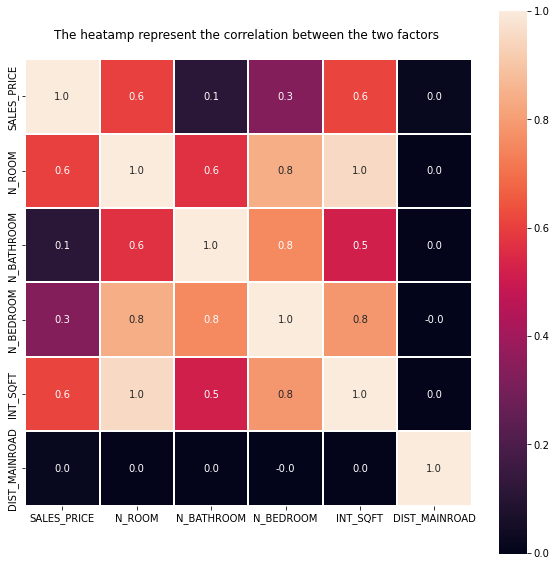

In [237]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,annot=True,fmt="0.1f",linewidth="0.4",ax=ax,square=True)
plt.title("The heatamp represent the correlation between the two factors \n")


## Influcing the sales price of the based on the utility availables

In [238]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [239]:
allpub,elo,nosewr,nosewa=df.groupby("UTILITY_AVAIL")["SALES_PRICE"]
allpub=pd.DataFrame({"allpub":allpub[1]})
elo=pd.DataFrame({"elo":elo[1]})
nosewr=pd.DataFrame({"nosewr":nosewr[1]})
nosewa=pd.DataFrame({"nosewa":nosewa[1]})

In [240]:
statistic,p_value=f_oneway(allpub,elo,nosewr,nosewa)
p_value


array([3.58167338e-07])

In [241]:
if(p_value<0.05):
    print("We are rejecting the null hypothesis")
    print()
else:
    print("We are not rejecting the null hypotesis")
    print()

We are rejecting the null hypothesis



## compare the sales price of the house in different area

In [242]:
area_sales=df["AREA"].value_counts()
area_sales

Chrompet      1702
Karapakkam    1366
KKNagar        997
Velachery      981
Anna Nagar     788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

In [243]:
area_sales=pd.DataFrame(area_sales)
area_sales.reset_index(inplace=True)

In [244]:
area_sales.rename(columns={"index":"Area","AREA":"No_of_house"},inplace=True)
area_sales

,Area,No_of_house
0,Chrompet,1702
1,Karapakkam,1366
2,KKNagar,997
3,Velachery,981
4,Anna Nagar,788
5,Adyar,774
6,TNagar,501


#### Number of house is more in chrompet area. and number of house is less in Tnagar

In [245]:
px.pie(area_sales,values="No_of_house",template='plotly_dark',names="Area",color_discrete_sequence=px.colors.sequential.Plasma,hole=0.5,width=700,height=400,title='<b> Houses Count in different Areas of Chennai</b>')


In [246]:
px.box(df,x='AREA',y='SALES_PRICE',color='AREA',template='plotly_dark',width=900,height=500,title='<b> Sales Price of Houses in different Areas')


In [247]:
df_bk=df

In [248]:
cleaned_df=df.to_csv("df.csv")

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### method1

## build the regression

In [250]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [251]:
# Coverting the labels into a numeric form using Label Encoder
for col in df.columns:
    if(df[col].dtypes=="object"):
        df[col]=le.fit_transform(df[col])

In [ ]:
df.head(4)

In [252]:
df.shape

(7109, 19)

In [253]:
x=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [254]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [255]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5687, 18), (1422, 18), (5687,), (1422,))

In [256]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [257]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [258]:
reg.coef_

array([ 4.26226259e+01, -3.25158604e+05,  3.18447988e+03,  4.58917242e+02,
       -1.44169104e+06, -1.19711349e+06,  1.77499697e+06, -9.81255504e+04,
        9.35977188e+05, -1.77873199e+06, -8.86133011e+04, -1.92514900e+05,
        5.94989715e+05, -2.71524424e+04, -7.61141146e+04, -2.50344279e+04,
        2.30251143e+05,  8.17386409e+00])

In [259]:
y_pred=reg.predict(x_test)

In [260]:
print('Mean square Error (MsE):', round(mean_squared_error(y_test, y_pred),3))  
print('Mean square Error (MRSE):', math.sqrt(round(mean_squared_error(y_test, y_pred),3)))
print('R2_score:', round(r2_score(y_test, y_pred),6))                                                   

Mean square Error (MsE): 2579748656565.692
Mean square Error (MRSE): 1606159.59872165
R2_score: 0.803633


In [261]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [262]:
result[['PRT_ID','AREA','Price_actual','Price_pred']].sample(20)

,PRT_ID,AREA,Price_actual,Price_pred
5214,4895,0,9892565,1.010331e+07
1302,3489,2,12654700,1.165790e+07
1921,2881,3,18485760,1.656142e+07
2847,6766,0,11435335,1.201217e+07
5192,1709,4,8899375,9.658269e+06
6146,1196,2,13214700,1.217842e+07
5235,4255,2,11398650,1.157762e+07
6038,4966,3,12734420,1.276019e+07
5095,5963,0,8179590,8.203196e+06
2225,534,2,8196110,7.420627e+06


### Multiple linear regression

In [263]:
px.scatter(result,x='Price_actual',y='Price_pred',trendline='ols',color_discrete_sequence=['magenta'],template='plotly_dark',title='<b> Actual Price  Vs  Predicted Price ')

##  Rigde Regression

In [264]:
ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge,param_grid={"alpha":np.logspace(-5,2,8)},
                   scoring="neg_mean_squared_error",n_jobs=1,refit=True,cv=10)

In [265]:
search.fit(x_train,y_train)
search.best_params_

{'alpha': 0.001}

In [266]:
ridge=Ridge(normalize=True,alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001, normalize=True)

In [267]:
y_pred=ridge.predict(x_train)

In [268]:
# finding the r score for trained data
print('R2_score:', round(r2_score(y_train, y_pred),6))

R2_score: 0.808455


In [269]:
y_pred=ridge.predict(x_test)
m=mean_squared_error(y_test,y_pred)
print("Mean root square error(MRSE)",math.sqrt(m))

Mean root square error(MRSE) 1605981.287034784


In [270]:
print('R2_score:', round(r2_score(y_test, y_pred=ridge.predict(x_test)),6))

R2_score: 0.803677


In [271]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [272]:
result[['Price_actual','Price_pred']].sample(10)

,Price_actual,Price_pred
5836,6613250,8.116514e+06
4028,5426740,5.521152e+06
3992,11963590,1.108256e+07
432,7705800,7.507740e+06
6044,14602040,1.376369e+07
3955,9045605,9.628974e+06
2684,14341940,1.347763e+07
1183,9260750,9.729269e+06
6359,4788000,3.223870e+06
23,9627380,8.174666e+06


In [273]:
px.scatter(result,x='Price_actual',y='Price_pred',trendline='ols',color_discrete_sequence=['magenta'],template='plotly_dark',title='<b> Actual Price  Vs  Predicted Price ')

##  Method 2

## By using get dummies method

In [274]:
df=pd.read_csv("df.csv")
df=df.drop(columns=["PRT_ID","Unnamed: 0"])

In [275]:
df=pd.get_dummies(df,columns=["AREA","SALE_COND","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"])
df.head(2)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_NoAccess,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1,1.0,3,4.0,3.9,4.9,4.330,144400,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2,1.0,5,4.9,4.2,2.5,3.765,304049,...,0,1,0,0,0,0,0,1,0,0


In [276]:
df.shape

(7109, 46)

In [143]:
x=df.drop(['SALES_PRICE','DIST_MAINROAD'],axis=1)
y=df['SALES_PRICE']

In [144]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5687, 44), (1422, 44), (5687,), (1422,))

In [146]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [147]:
y_pred=reg.predict(x_test) 

In [148]:
print('Mean square Error (MsE):', round(mean_squared_error(y_test, y_pred),3))  
print('Mean square Error (MRSE):', math.sqrt(round(mean_squared_error(y_test, y_pred),3)))
print('R2_score:', round(r2_score(y_test, y_pred),6)) 

Mean square Error (MsE): 602389011094.275
Mean square Error (MRSE): 776137.2372810591
R2_score: 0.954147


In [149]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [150]:
result[['Price_actual','Price_pred']].sample(20)

,Price_actual,Price_pred
4897,12415260,1.333366e+07
4537,15344360,1.562990e+07
6798,18515080,1.788357e+07
2260,11682020,1.249725e+07
4538,21008600,1.913389e+07
6464,7968450,7.597021e+06
4575,12837050,1.367816e+07
3024,8779845,1.037481e+07
5214,9892565,1.067375e+07
5974,12992320,1.402253e+07


In [151]:
px.scatter(result,x='Price_actual',y='Price_pred',trendline='ols',color_discrete_sequence=['magenta'],template='plotly_dark',title='<b> Actual Price  Vs  Predicted Price ')